In [2]:
import metview as mv

import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature#
import cdsapi
# Disable warnings for data download via API
import urllib3 
urllib3.disable_warnings()
import os



ModuleNotFoundError: No module named 'cdsapi'

# checking the output for the min/max of the month
Done with cdo and python. 
The cdo output has the wrong names for the temperature, it is mx2t not t2m.
But the numbers are fine


In [3]:
DATADIR="/home/cap/Downloads"
ds = xr.open_dataset(os.path.join(DATADIR,"monthly_mean_cdo_no-ar-ce_fc_sfc_202303.grib2"))

In [4]:
ds

<xarray.Dataset>
Dimensions:            (y: 989, x: 789)
Coordinates:
    time               datetime64[ns] ...
    step               timedelta64[ns] ...
    heightAboveGround  float64 ...
    latitude           (y, x) float64 ...
    longitude          (y, x) float64 ...
    valid_time         datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    t2m                (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             enmi
    GRIB_centreDescription:  Oslo
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Oslo
    history:                 2023-07-04T16:57 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
ds["t2m"] = ds["t2m"] -  273.15
import matplotlib as mpl
cmap = mpl.cm.coolwarm
#lats["latitude"]
test=ds.to_dataframe()
lats=test["latitude"].values
lons=test["longitude"].values

# this for the west
nx=1069
ny=1269
# this for the east
nx=789
ny=989
#lons=test["longitude"].reshape((ny,nx))
#lats=test["latitude"].reshape((ny,nx))


In [6]:
print(ds["t2m"].max(),ds["t2m"].min())

<xarray.DataArray 't2m' ()>
array(10.48605347)
Coordinates:
    time               datetime64[ns] 2023-03-01
    step               timedelta64[ns] 01:00:00
    heightAboveGround  float64 2.0
    valid_time         datetime64[ns] 2023-03-01T01:00:00 <xarray.DataArray 't2m' ()>
array(-19.3830719)
Coordinates:
    time               datetime64[ns] 2023-03-01
    step               timedelta64[ns] 01:00:00
    heightAboveGround  float64 2.0
    valid_time         datetime64[ns] 2023-03-01T01:00:00


In [7]:
ds["t2m"]

<xarray.DataArray 't2m' (y: 989, x: 789)>
array([[  0.10339355,   0.13757324,   0.15905762, ...,   9.845428  ,
          9.957733  ,   9.840546  ],
       [  0.20593262,   0.20202637,   0.21472168, ...,   9.79361   ,
          9.923492  ,  10.027008  ],
       [  0.14147949,   0.13757324,   0.15026855, ...,   9.706757  ,
          9.810272  ,   9.728241  ],
       ...,
       [-16.995178  , -17.02008   , -17.045471  , ...,   1.9530945 ,
          2.0331726 ,   1.860321  ],
       [-16.978088  , -17.01178   , -17.041077  , ...,   2.0535583 ,
          2.0370789 ,   1.8730164 ],
       [-17.024475  , -17.045471  , -17.049866  , ...,   2.040985  ,
          1.993988  ,   1.7802429 ]], dtype=float32)
Coordinates:
    time               datetime64[ns] 2023-03-01
    step               timedelta64[ns] 01:00:00
    heightAboveGround  float64 2.0
    latitude           (y, x) float64 70.13 70.13 70.12 ... 67.36 67.34 67.32
    longitude          (y, x) float64 340.6 340.7 340.7 ... 64.65 64.65 64.64
    valid_time         datetime64[ns] 2023-03-01T01:00:00
Dimensions without coordinates: y, x

In [8]:
lats

array([70.135     , 70.129472  , 70.12392063, ..., 67.36210922,
       67.34021128, 67.31831435])

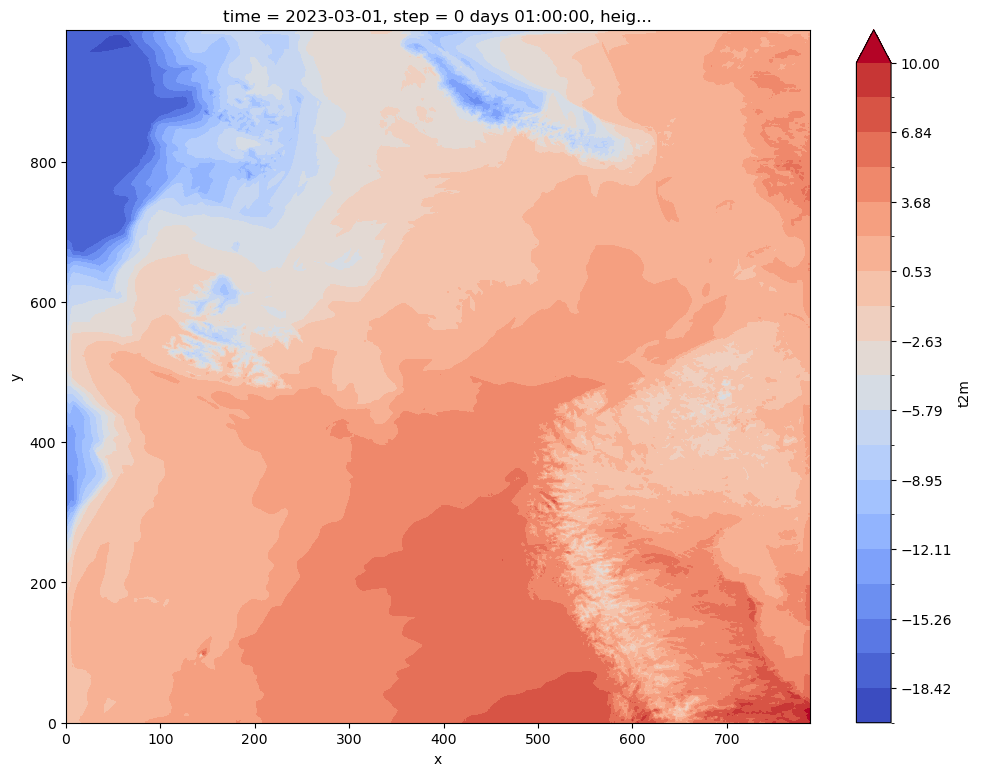

In [11]:
fig = plt.figure(figsize=[12,9])
levels=np.linspace(-20,10,20)
ds["t2m"].plot.contourf(cmap=cmap,levels=levels) #,x=ds["longitude"],y=ds["latitude"])#,x=ds_carra.latitude.values,y=ds_carra.longitude.values)


# checking the output from python script, that has the correct variable names

In [18]:
ds = xr.open_dataset(os.path.join(DATADIR,"monthly_mean_py_no-ar-ce_fc_sfc_202303.grib2"))

In [19]:
ds

<xarray.Dataset>
Dimensions:            (y: 989, x: 789)
Coordinates:
    time               datetime64[ns] ...
    step               timedelta64[ns] ...
    heightAboveGround  float64 ...
    latitude           (y, x) float64 ...
    longitude          (y, x) float64 ...
    valid_time         datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    mx2t               (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             enmi
    GRIB_centreDescription:  Oslo
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Oslo
    history:                 2023-07-04T17:02 GRIB to CDM+CF via cfgrib-0.9.1...

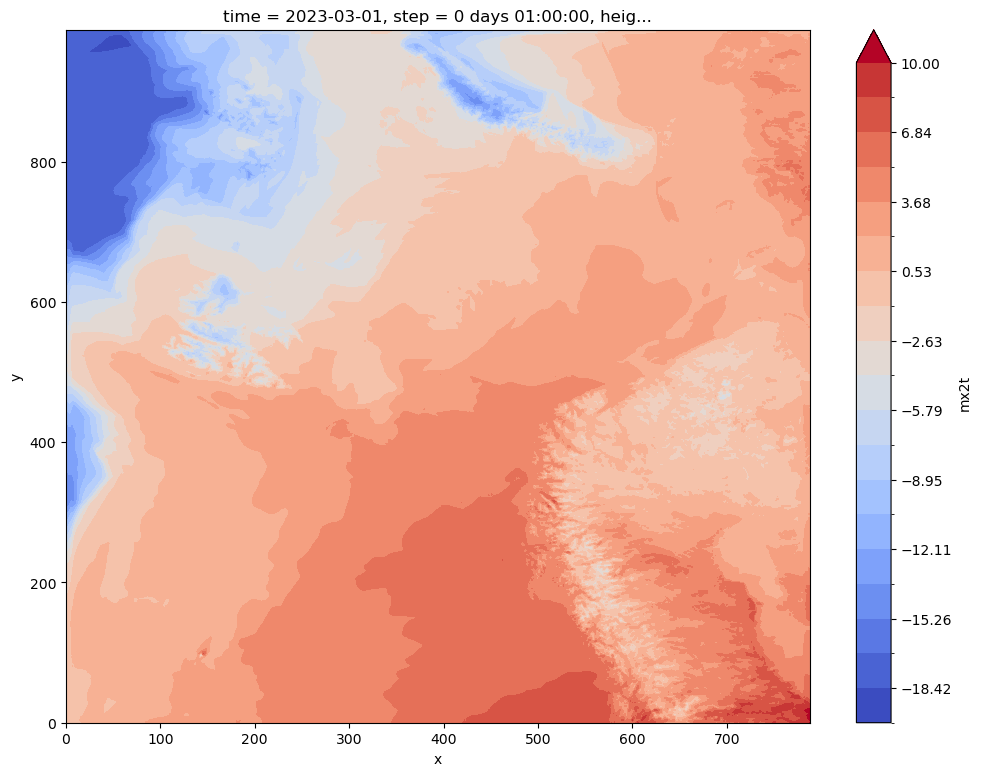

In [20]:
ds["mx2t"] = ds["mx2t"] -  273.15
fig2 = plt.figure(figsize=[12,9])

ds["mx2t"].plot.contourf(cmap=cmap,levels=levels) 
